In [1]:
!pip install ultralytics
!pip install deepface
!pip install opencv-python
!pip install pandas
!pip install numpy
!pip install tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
from deepface import DeepFace
import os
import cv2
import numpy as np
import json
from tqdm import tqdm

# New student folders
student_dirs = {
    "Shahan": "/content/drive/MyDrive/Classroom/fyp4.0/Shahan/img2",
    "Haroon": "/content/drive/MyDrive/Classroom/fyp4.0/Haroon/img1"
}

embeddings = {}

# FaceNet model
model_name = "Facenet"
print("Generating FaceNet embeddings...")

for name, path in student_dirs.items():
    embeddings[name] = []
    for file in tqdm(os.listdir(path), desc=f"Processing {name}"):
        img_path = os.path.join(path, file)
        try:
            # Ensure image is read correctly
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Get embedding
            embedding_obj = DeepFace.represent(img_path=img_path, model_name=model_name, enforce_detection=False)
            if isinstance(embedding_obj, list) and len(embedding_obj) > 0:
                embeddings[name].append(embedding_obj[0]["embedding"])
        except Exception as e:
            print(f"❌ Error with {img_path}: {e}")

# Save to JSON
output_path = "/content/drive/MyDrive/Classroom/fyp4.0/embeddings_facenet.json"
with open(output_path, "w") as f:
    json.dump(embeddings, f)

print(f"\n✅ Embeddings saved to: {output_path}")


Generating FaceNet embeddings...


Processing Shahan:   0%|          | 0/1 [00:00<?, ?it/s]

25-07-24 14:48:23 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5

  0%|          | 0.00/92.2M [00:00<?, ?B/s]
 12%|█▏        | 11.0M/92.2M [00:00<00:01, 41.5MB/s]
 28%|██▊       | 26.2M/92.2M [00:00<00:00, 80.1MB/s]
 45%|████▍     | 41.4M/92.2M [00:00<00:00, 103MB/s] 
 59%|█████▉    | 54.5M/92.2M [00:00<00:00, 95.2MB/s]
 71%|███████   | 65.5M/92.2M [00:00<00:00, 76.9MB/s]
100%|██████████| 92.2M/92.2M [00:01<00:00, 90.5MB/s]
Processing Haroon: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


✅ Embeddings saved to: /content/drive/MyDrive/Classroom/fyp4.0/embeddings_facenet.json


In [13]:
import os
import json
import cv2
import numpy as np
from deepface import DeepFace
from ultralytics import YOLO
from datetime import datetime
import pandas as pd
from google.colab.patches import cv2_imshow  # ✅ for displaying in Colab

# ==== PATHS ====
IMAGE_PATH = "/content/drive/MyDrive/Classroom/fyp4.0/Shahan/img2/shahan_img2.jpeg"
EMBEDDINGS_PATH = "/content/drive/MyDrive/Classroom/fyp4.0/embeddings_facenet.json"

# ✅ Student info
students_info = [
    {"Roll_No": "F2021266031", "Name": "Shahan", "Department": "CS"},
    {"Roll_No": "F2021266600", "Name": "Haroon", "Department": "CS"},
    {"Roll_No": "F2021266030", "Name": "Wassam Shah", "Department": "CS"},
    {"Roll_No": "F2021266032", "Name": "Reshmail Fatima", "Department": "CS"}
]

# ==== Load embeddings ====
with open(EMBEDDINGS_PATH, "r") as f:
    known_embeddings = json.load(f)

# Convert lists to numpy arrays
for name in known_embeddings:
    known_embeddings[name] = np.array(known_embeddings[name])

# ==== Load YOLO model ====
yolo_model = YOLO("yolov8n.pt")  # use your own trained model path if needed

# ==== Load Image ====
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise Exception("Image not found!")

results = yolo_model(img)

present_students = set()

# ==== Process each face detected ====
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    face_crop = img[y1:y2, x1:x2]

    if face_crop.size == 0:
        continue

    try:
        # Resize for FaceNet input (DeepFace auto handles it)
        # Show face crop for debug
        cv2_imshow(face_crop)

        # Compute embedding
        embedding = DeepFace.represent(face_crop, model_name="Facenet", enforce_detection=False)[0]["embedding"]
        embedding = np.array(embedding)

        # Compare with known embeddings
        min_dist = float("inf")
        identity = "Unknown"
        for name, known_emb in known_embeddings.items():
            dist = np.linalg.norm(known_emb - embedding)
            if dist < min_dist:
                min_dist = dist
                identity = name

        if min_dist < 10:  # ✅ Threshold can be adjusted
            present_students.add(identity)
    except Exception as e:
        print(f"Recognition failed: {e}")
        continue

# ==== Mark Attendance ====
today = datetime.now().strftime("%Y-%m-%d")

attendance = []
for student in students_info:
    name = student["Name"]
    status = "Present" if name in present_students else "Absent"
    attendance.append({
        "Date": today,
        "Name": name,
        "Roll_No": student["Roll_No"],
        "Department": student["Department"],
        "Status": status
    })

# Display attendance
print(f"\n📝 Attendance for {os.path.basename(IMAGE_PATH)}:")
for record in attendance:
    print(f"- {record['Name']}: {record['Status']}")

# Save attendance to CSV
df = pd.DataFrame(attendance)
df.to_csv("attendance.csv", index=False)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


0: 448x640 1 person, 1 tie, 411.6ms
Speed: 25.5ms preprocess, 411.6ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


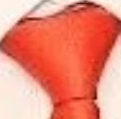

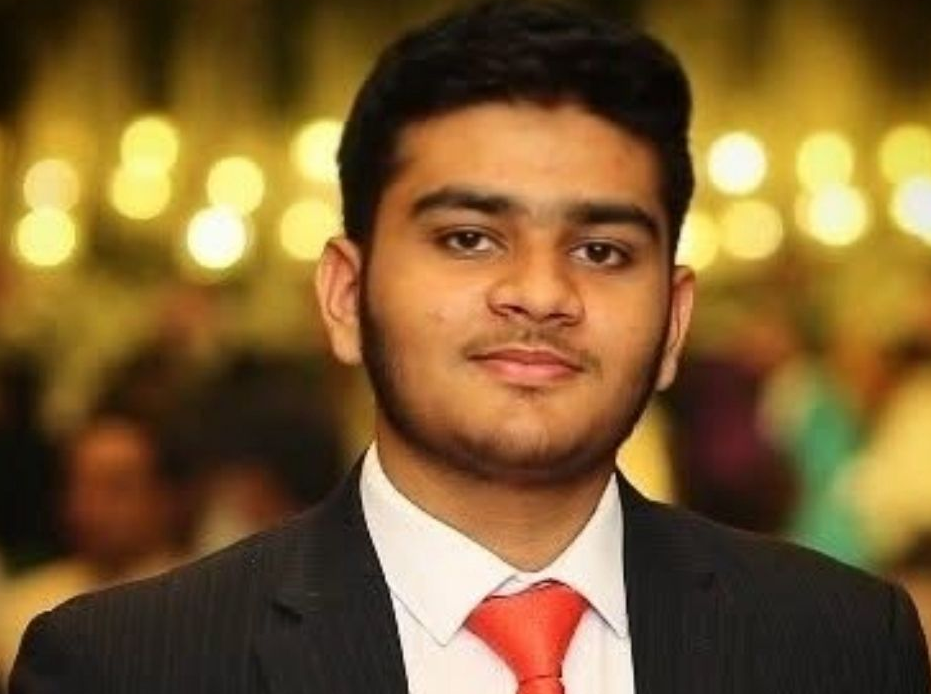


📝 Attendance for img.jpeg:
- Shahan: Absent
- Haroon: Present
- Wassam Shah: Absent
- Reshmail Fatima: Absent


In [14]:
import os
import json
import cv2
import numpy as np
from deepface import DeepFace
from ultralytics import YOLO
from datetime import datetime
import pandas as pd
from google.colab.patches import cv2_imshow  # ✅ for displaying in Colab

# ==== PATHS ====
IMAGE_PATH = "/content/drive/MyDrive/Classroom/fyp4.0/Shahan/img2/shahan_img2.jpeg"
EMBEDDINGS_PATH = "/content/drive/MyDrive/Classroom/fyp4.0/embeddings_facenet.json"

# ✅ Student info
students_info = [
    {"Roll_No": "F2021266031", "Name": "Shahan", "Department": "CS"},
    {"Roll_No": "F2021266600", "Name": "Haroon", "Department": "CS"},
    {"Roll_No": "F2021266030", "Name": "Wassam Shah", "Department": "CS"},
    {"Roll_No": "F2021266032", "Name": "Reshmail Fatima", "Department": "CS"}
]

# ==== Load embeddings ====
with open(EMBEDDINGS_PATH, "r") as f:
    known_embeddings = json.load(f)

# Convert lists to numpy arrays
for name in known_embeddings:
    known_embeddings[name] = np.array(known_embeddings[name])

# ==== Load YOLO model ====
yolo_model = YOLO("yolov8n.pt")  # use your own trained model path if needed

# ==== Load Image ====
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise Exception("Image not found!")

results = yolo_model(img)

present_students = set()

# ==== Process each face detected ====
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    face_crop = img[y1:y2, x1:x2]

    if face_crop.size == 0:
        continue

    try:
        # Resize for FaceNet input (DeepFace auto handles it)
        # Show face crop for debug
        cv2_imshow(face_crop)

        # Compute embedding
        embedding = DeepFace.represent(face_crop, model_name="Facenet", enforce_detection=False)[0]["embedding"]
        embedding = np.array(embedding)

        # Compare with known embeddings
        min_dist = float("inf")
        identity = "Unknown"
        for name, known_emb in known_embeddings.items():
            dist = np.linalg.norm(known_emb - embedding)
            if dist < min_dist:
                min_dist = dist
                identity = name

        if min_dist < 10:  # ✅ Threshold can be adjusted
            present_students.add(identity)
    except Exception as e:
        print(f"Recognition failed: {e}")
        continue

# ==== Mark Attendance ====
today = datetime.now().strftime("%Y-%m-%d")

attendance = []
for student in students_info:
    name = student["Name"]
    status = "Present" if name in present_students else "Absent"
    attendance.append({
        "Date": today,
        "Name": name,
        "Roll_No": student["Roll_No"],
        "Department": student["Department"],
        "Status": status
    })

# Display attendance
print(f"\n📝 Attendance for {os.path.basename(IMAGE_PATH)}:")
for record in attendance:
    print(f"- {record['Name']}: {record['Status']}")

# Save attendance to CSV
df = pd.DataFrame(attendance)
df.to_csv("attendance.csv", index=False)



0: 384x640 2 persons, 557.9ms
Speed: 6.8ms preprocess, 557.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


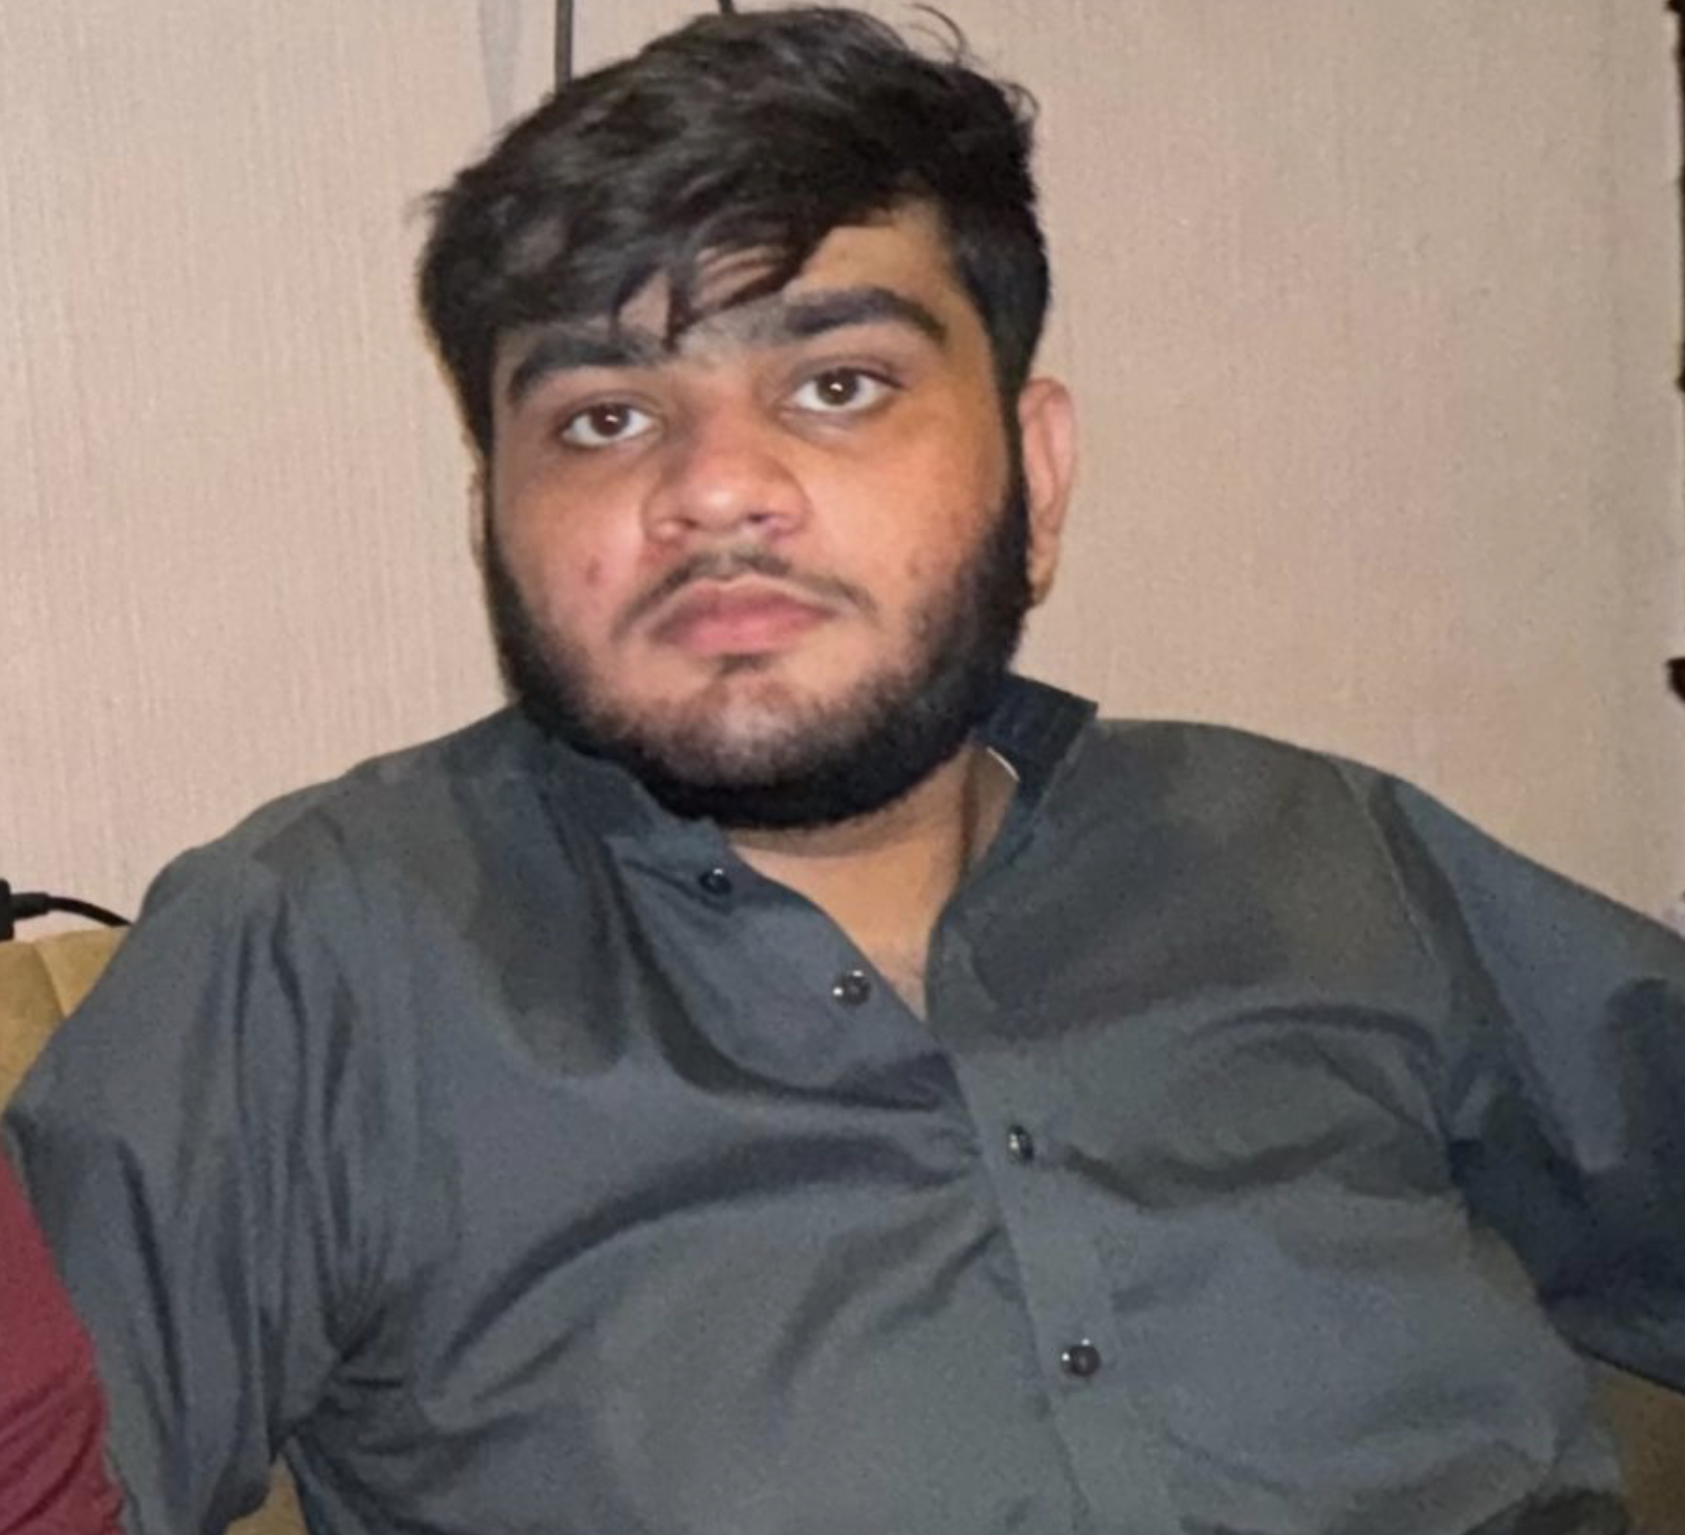

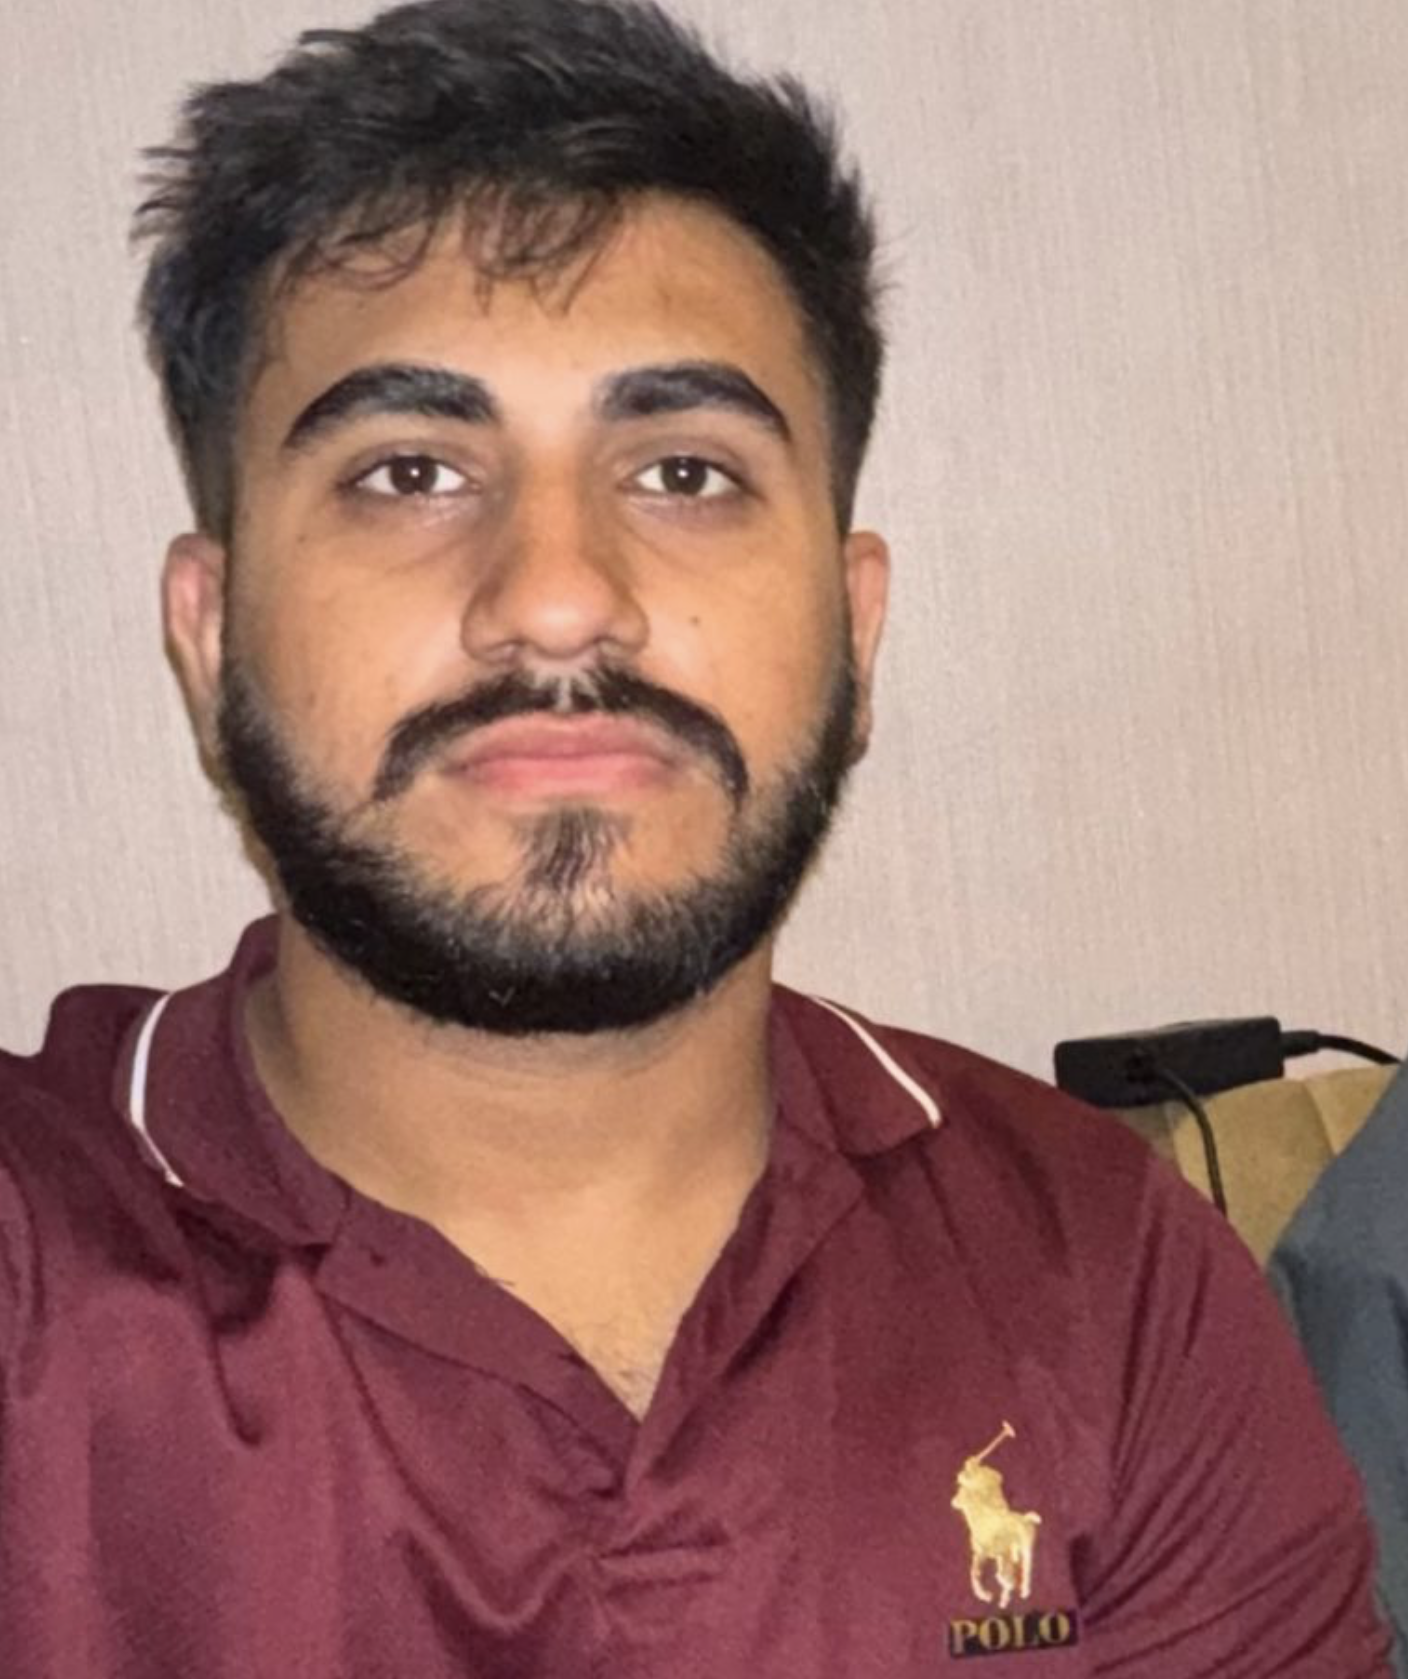


📝 Attendance for img.png:
- Shahan: Present
- Haroon: Present
- Wassam Shah: Absent
- Reshmail Fatima: Absent


In [15]:
import os
import json
import cv2
import numpy as np
from deepface import DeepFace
from ultralytics import YOLO
from datetime import datetime
import pandas as pd
from google.colab.patches import cv2_imshow  # ✅ for displaying in Colab

# ==== PATHS ====
IMAGE_PATH = "/content/drive/MyDrive/Classroom/fyp_3.0/img.png"
EMBEDDINGS_PATH = "/content/drive/MyDrive/Classroom/fyp4.0/embeddings_facenet.json"

# ✅ Student info
students_info = [
    {"Roll_No": "F2021266031", "Name": "Shahan", "Department": "CS"},
    {"Roll_No": "F2021266600", "Name": "Haroon", "Department": "CS"},
    {"Roll_No": "F2021266030", "Name": "Wassam Shah", "Department": "CS"},
    {"Roll_No": "F2021266032", "Name": "Reshmail Fatima", "Department": "CS"}
]

# ==== Load embeddings ====
with open(EMBEDDINGS_PATH, "r") as f:
    known_embeddings = json.load(f)

# Convert lists to numpy arrays
for name in known_embeddings:
    known_embeddings[name] = np.array(known_embeddings[name])

# ==== Load YOLO model ====
yolo_model = YOLO("yolov8n.pt")  # use your own trained model path if needed

# ==== Load Image ====
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise Exception("Image not found!")

results = yolo_model(img)

present_students = set()

# ==== Process each face detected ====
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    face_crop = img[y1:y2, x1:x2]

    if face_crop.size == 0:
        continue

    try:
        # Resize for FaceNet input (DeepFace auto handles it)
        # Show face crop for debug
        cv2_imshow(face_crop)

        # Compute embedding
        embedding = DeepFace.represent(face_crop, model_name="Facenet", enforce_detection=False)[0]["embedding"]
        embedding = np.array(embedding)

        # Compare with known embeddings
        min_dist = float("inf")
        identity = "Unknown"
        for name, known_emb in known_embeddings.items():
            dist = np.linalg.norm(known_emb - embedding)
            if dist < min_dist:
                min_dist = dist
                identity = name

        if min_dist < 10:  # ✅ Threshold can be adjusted
            present_students.add(identity)
    except Exception as e:
        print(f"Recognition failed: {e}")
        continue

# ==== Mark Attendance ====
today = datetime.now().strftime("%Y-%m-%d")

attendance = []
for student in students_info:
    name = student["Name"]
    status = "Present" if name in present_students else "Absent"
    attendance.append({
        "Date": today,
        "Name": name,
        "Roll_No": student["Roll_No"],
        "Department": student["Department"],
        "Status": status
    })

# Display attendance
print(f"\n📝 Attendance for {os.path.basename(IMAGE_PATH)}:")
for record in attendance:
    print(f"- {record['Name']}: {record['Status']}")

# Save attendance to CSV
df = pd.DataFrame(attendance)
df.to_csv("attendance.csv", index=False)
